In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# nutrition_df = pd.read_csv('Nutritions_US.csv')

    
food_df = pd.read_csv('Nutritions_US.csv', encoding='cp1252')

In [5]:
food_df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded"


In [6]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             8790 non-null   int64  
 1   Shrt_Desc          8790 non-null   object 
 2   Water_(g)          8789 non-null   float64
 3   Energ_Kcal         8790 non-null   int64  
 4   Protein_(g)        8790 non-null   float64
 5   Lipid_Tot_(g)      8790 non-null   float64
 6   Ash_(g)            8465 non-null   float64
 7   Carbohydrt_(g)     8790 non-null   float64
 8   Fiber_TD_(g)       8196 non-null   float64
 9   Sugar_Tot_(g)      6958 non-null   float64
 10  Calcium_(mg)       8442 non-null   float64
 11  Iron_(mg)          8646 non-null   float64
 12  Magnesium_(mg)     8051 non-null   float64
 13  Phosphorus_(mg)    8211 non-null   float64
 14  Potassium_(mg)     8364 non-null   float64
 15  Sodium_(mg)        8707 non-null   float64
 16  Zinc_(mg)          8084 

In [7]:
Nutrition_features = { 'NDB_No': 'Nutrition database number',
                      'Shrt_Desc': 'Short description',
                      'Iron_(mg)': 'Iron',
                      'Zinc_(mg)': 'Zinc',
                      'Copper_mg)': 'Copper',
                      'Selenium_(¾g)': 'Selenium',
                      'Vit_C_(mg)': 'Vitamin C',
                      'Vit_B6_(mg)': 'Vitamin B6',
                      'Folate_Tot_(¾g)': 'Folate, total',
                      'Folic_Acid_(¾g)': 'Folic acid',
                      'Food_Folate_(¾g)': 'Food Folate',
                      'Folate_DFE_(¾g)': 'Folate, DFE',
                      'Vit_B12_(¾g)': 'Vitamin B12',
                      'Vit_A_IU': 'Vitamin A, IU',
                      'Vit_A_RAE': 'Vitamin A, RAE',
                      'Retinol_(¾g)': 'Retinol',
                      'Alpha_Carot_(¾g)': 'Carotene, alpha',
                      'Beta_Carot_(¾g)': 'Carotene, beta',
                      'Vit_E_(mg)': 'Vitamin E (alpha-tocopherol)',
                      'Vit_D_¾g': 'Vitamin D (D2 + D3)',
                      'Vit_D_IU': 'Vitamin D',
                      'GmWt_1': 'gram weight 1',
                      'GmWt_Desc1': 'gram weight 1 descriptions',
                      'GmWt_2': 'gram weight 2',
                      'GmWt_Desc2': 'gram weight 2 description'   
}

In [8]:
food_red_df = food_df[list(Nutrition_features.keys())]
food_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NDB_No            8790 non-null   int64  
 1   Shrt_Desc         8790 non-null   object 
 2   Iron_(mg)         8646 non-null   float64
 3   Zinc_(mg)         8084 non-null   float64
 4   Copper_mg)        7533 non-null   float64
 5   Selenium_(¾g)     7090 non-null   float64
 6   Vit_C_(mg)        7972 non-null   float64
 7   Vit_B6_(mg)       7885 non-null   float64
 8   Folate_Tot_(¾g)   7529 non-null   float64
 9   Folic_Acid_(¾g)   6751 non-null   float64
 10  Food_Folate_(¾g)  7022 non-null   float64
 11  Folate_DFE_(¾g)   6733 non-null   float64
 12  Vit_B12_(¾g)      7597 non-null   float64
 13  Vit_A_IU          8079 non-null   float64
 14  Vit_A_RAE         7255 non-null   float64
 15  Retinol_(¾g)      6984 non-null   float64
 16  Alpha_Carot_(¾g)  5532 non-null   float64


In [9]:
food_red_df.head()

,NDB_No,Shrt_Desc,Iron_(mg),Zinc_(mg),Copper_mg),Selenium_(¾g),Vit_C_(mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),...,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,1001,"BUTTER,WITH SALT",0.02,0.09,0.000,1.0,0.0,0.003,3.0,0.0,...,671.0,0.0,158.0,2.32,0.0,0.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp
1,1002,"BUTTER,WHIPPED,W/ SALT",0.05,0.05,0.010,0.0,0.0,0.008,4.0,0.0,...,671.0,1.0,135.0,1.37,0.0,0.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp
2,1003,"BUTTER OIL,ANHYDROUS",0.00,0.01,0.001,0.0,0.0,0.001,0.0,0.0,...,824.0,0.0,193.0,2.80,0.0,0.0,12.80,1 tbsp,205.0,1 cup
3,1004,"CHEESE,BLUE",0.31,2.66,0.040,14.5,0.0,0.166,36.0,0.0,...,192.0,0.0,74.0,0.25,0.5,21.0,28.35,1 oz,17.0,1 cubic inch
4,1005,"CHEESE,BRICK",0.43,2.60,0.024,14.5,0.0,0.065,20.0,0.0,...,286.0,0.0,76.0,0.26,0.5,22.0,132.00,"1 cup, diced",113.0,"1 cup, shredded"


In [14]:
#create new df with relevant columns
food_df = food_red_df[['NDB_No', 'Shrt_Desc', 'Zinc_(mg)', 'Selenium_(¾g)', 'Vit_B6_(mg)',
                                  'Vit_B12_(¾g)', 'GmWt_1', 'GmWt_Desc1','GmWt_2','GmWt_Desc2']]

In [15]:
food_df.head()

,NDB_No,Shrt_Desc,Zinc_(mg),Selenium_(¾g),Vit_B6_(mg),Vit_B12_(¾g),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,1001,"BUTTER,WITH SALT",0.09,1.0,0.003,0.17,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp
1,1002,"BUTTER,WHIPPED,W/ SALT",0.05,0.0,0.008,0.07,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp
2,1003,"BUTTER OIL,ANHYDROUS",0.01,0.0,0.001,0.01,12.80,1 tbsp,205.0,1 cup
3,1004,"CHEESE,BLUE",2.66,14.5,0.166,1.22,28.35,1 oz,17.0,1 cubic inch
4,1005,"CHEESE,BRICK",2.60,14.5,0.065,1.26,132.00,"1 cup, diced",113.0,"1 cup, shredded"


In [16]:
food_df.describe()

,NDB_No,Zinc_(mg),Selenium_(¾g),Vit_B6_(mg),Vit_B12_(¾g),GmWt_1,GmWt_2
count,8790.000000,8084.000000,7090.000000,7885.000000,7597.000000,8490.000000,4825.000000
mean,15663.495222,2.117438,15.591016,0.291531,1.392472,96.395130,250.747668
std,9251.413586,3.437209,30.471099,0.485057,4.566460,84.337063,382.226774
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000
25%,9086.250000,0.340000,1.300000,0.051000,0.000000,29.000000,42.000000
50%,14427.500000,0.990000,10.100000,0.150000,0.240000,85.000000,164.000000
75%,20142.750000,2.920000,24.300000,0.390000,1.610000,130.000000,305.000000
max,93600.000000,90.950000,1917.000000,12.000000,98.890000,1184.000000,5717.000000


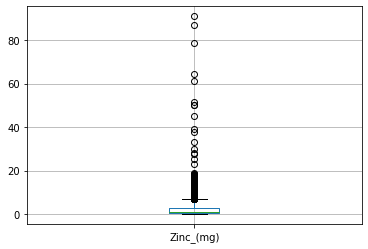

In [19]:
food_plt = food_df.boxplot(column ='Zinc_(mg)')

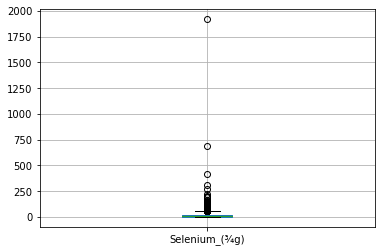

In [20]:
food_plt = food_df.boxplot(column ='Selenium_(¾g)')

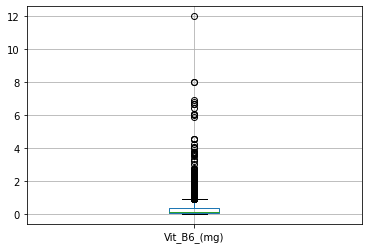

In [21]:
food_plt = food_df.boxplot(column ='Vit_B6_(mg)')

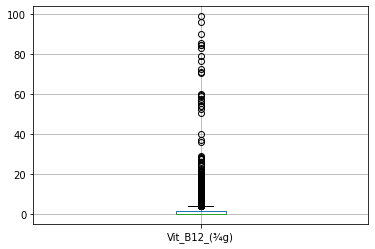

In [22]:
food_plt = food_df.boxplot(column ='Vit_B12_(¾g)')

In [37]:
def food_scores(NDB_No):
    index = food_df[food_df["NDB_No"] == NDB_No].index[0]
    Score = 0
    for i in range(len(food_df)):
        if(food_df['Vit_B12_(¾g)'][index] >= 98.89):
            Score += 1;
        if(food_df['Zinc_(mg)'][index] >= 90.95):
            Score += 1
        if(food_df['Vit_B6_(mg)'][index]>= 12.0):
            Score += 1
        if(food_df['Selenium_(¾g)'][index]>= 1917.0):
            Score += 1

    return Score
    

In [40]:
food_scores(1287)

0